In [28]:
import pandas as pd
import seaborn as sns

In [29]:
data=pd.read_csv("dataemployee.csv")

In [30]:
data.head()

,Test id,Experience,Test Score,Skills,Salary
0,534,3,9,5,40000
1,510,2,7,3,28000
2,523,5,6,2,23000
3,466,2,3,2,12000
4,492,1,2,1,5000


In [31]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import train_test_split
x = data[['Experience', 'Test Score', 'Skills']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [32]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
       subsample=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=1, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=1, nthread=-1, num_parallel_tree=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [33]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

R^2 score: -0.08
MAE score: 14000.00
EVS score: 0.00


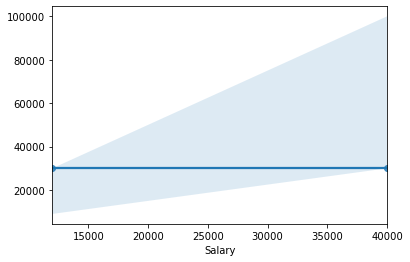

In [34]:
predictions = classifier.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)

In [35]:
import pickle
with open('employee.pkl', 'wb') as file:
    pickle.dump(classifier, file)